In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
file_path = 'C:\\Users\\Child-PC\\Documents\\Doc\\Kerja\\Jakarta Smart City\\Data\\Predictive\\Fatmawati thamrin\\Cleaning Fatmawati-Thamrin.xlsx'
kec = pd.read_excel(file_path, parse_dates = ['Tanggal'], index_col='Tanggal')
kec

,Fatmawati,Panglima Polim,Sisingamangaraja,Jenderal Sudirman,MH Thamrin
Tanggal,,,,,
2019-01-01,17.376960,6.957529,9.197301,11.707729,14.105469
2019-01-02,15.682563,5.560370,8.236382,11.707729,10.701706
2019-01-03,13.735798,6.086657,7.093376,10.188881,13.504935
2019-01-04,12.891066,5.808450,9.181057,12.012760,10.971397
2019-01-05,12.701404,5.701319,8.518150,17.619137,14.980375
2019-01-06,18.161720,7.490725,9.734099,14.509202,10.820507
2019-01-07,11.698292,6.424619,8.533449,14.540660,14.530612
2019-01-08,9.651816,4.750943,8.857869,11.382819,13.084725
2019-01-09,11.014376,4.985365,8.250382,12.298763,13.561947


In [4]:
#Checking null value
kec.isnull().sum()

Fatmawati            0
Panglima Polim       0
Sisingamangaraja     0
Jenderal Sudirman    0
MH Thamrin           0
dtype: int64

In [5]:
#Checking tipe dari masing-masing row
kec.dtypes

Fatmawati            float64
Panglima Polim       float64
Sisingamangaraja     float64
Jenderal Sudirman    float64
MH Thamrin           float64
dtype: object

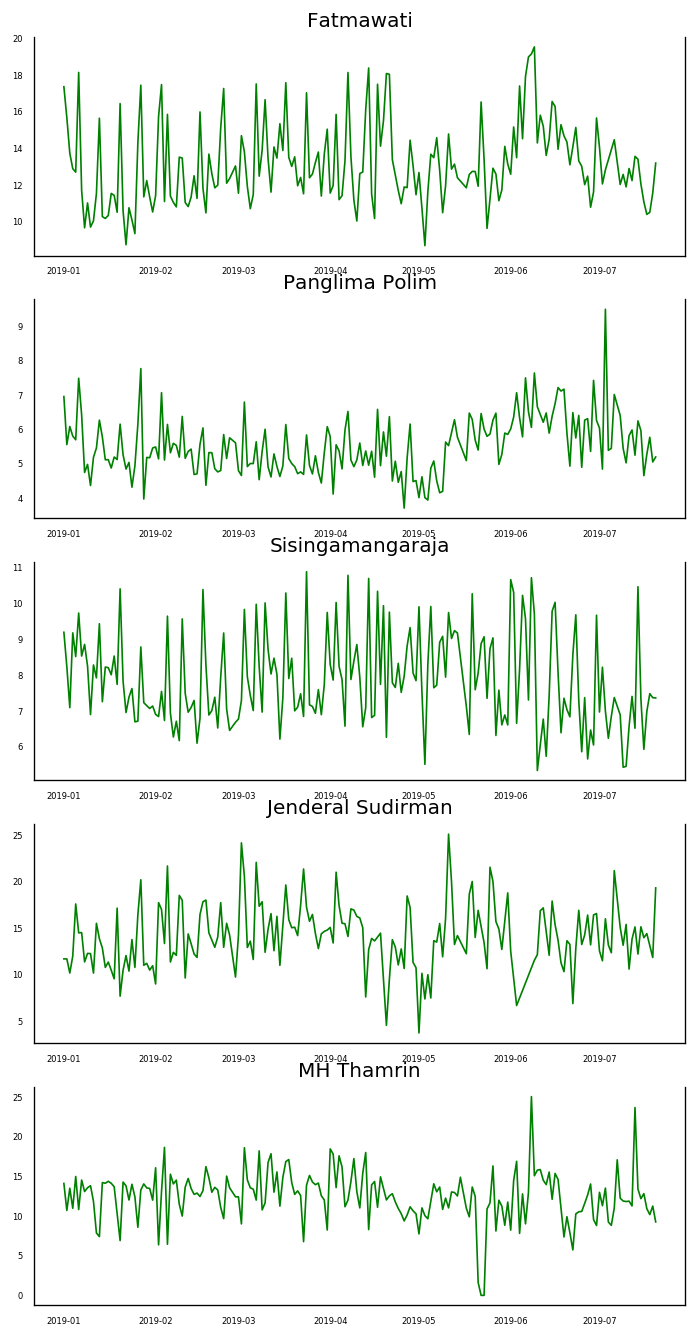

In [7]:
#Ploting masing-masing variabel
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(7,14))
for i, ax in enumerate(axes.flatten()):
    data = kec[kec.columns[i]]
    ax.plot(data, color='green', linewidth=1)
    #Setting visualisasi grafik
    ax.set_title(kec.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=5)

In [8]:
#Uji kausalitas granger
#    Check Granger Causality of all possible combinations of the Time series.
#    The rows are the response variable, columns are predictors. The values in the table 
#    are the P-Values. P-Values lesser than the significance level (0.05), implies 
#    the Null Hypothesis that the coefficients of the corresponding past values is 
#    zero, that is, the X does not cause Y can be rejected.
#    data      : pandas dataframe containing the time series variables
#    variables : list containing names of the time series variables.

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    kec = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in kec.columns:
        for r in kec.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            kec.loc[r, c] = min_p_value
    kec.columns = [var + '_x' for var in variables]
    kec.index = [var + '_y' for var in variables]
    return kec

grangers_causation_matrix(kec, variables = kec.columns)

,Fatmawati_x,Panglima Polim_x,Sisingamangaraja_x,Jenderal Sudirman_x,MH Thamrin_x
Fatmawati_y,1.0000,0.1448,0.0005,0.1073,0.0734
Panglima Polim_y,0.0175,1.0000,0.0630,0.0569,0.1761
Sisingamangaraja_y,0.2149,0.0880,1.0000,0.0746,0.0001
Jenderal Sudirman_y,0.0144,0.0049,0.0024,1.0000,0.3839
MH Thamrin_y,0.0000,0.0344,0.0005,0.0201,1.0000


In [9]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(kec, alpha=0.05): 
    """Johanson's Cointegration"""
    out = coint_johansen(kec,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 17): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(kec.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(kec)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Fatmawati         ::  72.34     > 60.0627   =>   True
Panglima Polim    ::  41.41     > 40.1749   =>   True
Sisingamangaraja  ::  19.78     > 24.2761   =>   False
Jenderal Sudirman ::  5.83      > 12.3212   =>   False
MH Thamrin        ::  0.35      > 4.1296    =>   False


In [10]:
#Pembagian data training dan data validasi
nobs = 20
kec_train, kec_test = kec[0:-nobs], kec[-nobs:]

# Check size
print(kec_train.shape)
print(kec_test.shape)

(181, 5)
(20, 5)


In [11]:
#Uji Stasioneritas menggunakan uji ADF (Augmented Dickey Fuller)
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    #Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
          
for name, column in kec_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Fatmawati" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6134
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0903. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Panglima Polim" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8755
 No. Lags Chosen       = 6
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.3437. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Sisingamangaraja" 
    -----------------------------------------------
 Null H

In [12]:
# 1st difference
kec_differenced = kec_train.diff().dropna()

for name, column in kec_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Fatmawati" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4485
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Panglima Polim" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.4065
 No. Lags Chosen       = 5
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Sisingamangaraja" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 S

In [14]:
#encari lag (order var) berdasarkan nilai AIC terkecil
model = VAR(kec_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  6.577652419889048
BIC :  7.111851158298112
FPE :  718.9400985390754
HQIC:  6.794265784799421 

Lag Order = 2
AIC :  6.234404377294734
BIC :  7.217539743958019
FPE :  510.39904575128577
HQIC:  6.633092154210784 

Lag Order = 3
AIC :  6.067911769764597
BIC :  7.503459671492881
FPE :  432.847766259549
HQIC:  6.650114242099855 

Lag Order = 4
AIC :  6.139937549151689
BIC :  8.031419478009678
FPE :  466.6823297227412
HQIC:  6.907113248254159 

Lag Order = 5
AIC :  5.922665683414218
BIC :  8.2736495497574
FPE :  377.56563014544133
HQIC:  6.876291698416898 

Lag Order = 6
AIC :  5.591877910223628
BIC :  8.40597889515611
FPE :  273.44362032760773
HQIC:  6.733450204287838 

Lag Order = 7
AIC :  5.622331189790165
BIC :  8.903212617591322
FPE :  285.1949452860879
HQIC:  6.95336492288885 

Lag Order = 8
AIC :  5.751866020878172
BIC :  9.503240251963973
FPE :  329.8438310440335
HQIC:  7.273895879269643 

Lag Order = 9
AIC :  5.806297190039341
BIC :  10.03192653504292
FPE :  355

C:\Users\Child-PC\Documents\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [15]:
#Metode lain untuk mengecek orde VAR dari data
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,7.343,7.436,1545.,7.381
1,6.654,7.211*,775.7,6.880
2,6.299,7.322,544.6,6.714*
3,6.125,7.612,458.3,6.728
4,6.172,8.124,482.1,6.964
5,5.985,8.402,402.4,6.966
6,5.667*,8.549,295.3*,6.837
7,5.735,9.082,320.2,7.094
8,5.860,9.672,368.7,7.407
9,5.911,10.19,396.5,7.647


In [16]:
#Modelling with VAR
#Estimasi parameter model VAR

model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Sep, 2019
Time:                     13:54:56
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    8.40598
Nobs:                     174.000    HQIC:                   6.73345
Log likelihood:          -1565.97    FPE:                    273.444
AIC:                      5.59188    Det(Omega_mle):         120.461
--------------------------------------------------------------------
Results for equation Fatmawati
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.025370         0.145264           -0.175           0.861
L1.Fatmawati                -0.582731         0.099074           -5.882           0.000
L1.Panglima Polim           

In [17]:
# Uji residu
# The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no 
# significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer
# it is to 4 implies negative serial correlation.

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(kec.columns, out):
    print(col, ':', round(val, 2))

Fatmawati : 1.98
Panglima Polim : 1.96
Sisingamangaraja : 1.9
Jenderal Sudirman : 1.98
MH Thamrin : 2.02


In [18]:
# Menentukan lag berdasarkan hasil yang telah diperoleh sebelumnya
lag_order = model_fitted.k_ar
print(lag_order)  #> 6

# Input data for forecasting
forecast_input = kec_differenced.values[-lag_order:]
forecast_input

6


array([[-0.29653618, -1.50795264, -1.4287305 , -3.67470228,  0.04706894],
       [-1.00504684,  1.37027491,  1.50899003,  1.02427096,  1.00808654],
       [ 0.46531254,  0.04423452, -1.71079023,  2.14095423,  1.06266816],
       [-1.70071004, -0.95298307,  0.80781803, -3.20584186,  1.38423071],
       [ 0.83661684,  2.06550364, -0.41670734,  3.22087665, -4.4811366 ],
       [ 4.05012708, -1.16751341,  3.62151838,  0.14701778, -0.7481426 ]])

In [19]:
# Forecast menggunakan VAR
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
kec_forecast = pd.DataFrame(fc, index=kec.index[-nobs:], columns=kec.columns + '_1d')
kec_forecast

,Fatmawati_1d,Panglima Polim_1d,Sisingamangaraja_1d,Jenderal Sudirman_1d,MH Thamrin_1d
Tanggal,,,,,
2019-07-01,-2.523126,0.331627,-2.453142,-1.036329,5.114597
2019-07-02,-1.440671,-0.778529,-1.076312,-2.282359,-1.771475
2019-07-03,1.833262,0.753121,1.964023,0.455329,-1.569177
2019-07-04,-2.709886,-0.348638,-1.938376,1.325181,2.930866
2019-07-05,0.730112,-0.406043,0.297773,-0.530700,-2.494529
2019-07-06,1.268530,0.614062,-0.391947,1.258937,0.188967
2019-07-07,1.350418,0.059232,2.305947,0.439600,-0.856876
2019-07-08,-1.440901,-0.054462,-1.081616,-1.160038,1.835569
2019-07-09,-1.166743,-0.393650,-1.024787,-0.178393,0.228190


In [20]:
#Mengembalikan skala hasil forecasting (hasil differencing)
def invert_transformation(kec_train, kec_forecast, first_diff=False):
    kec_fc = kec_forecast.copy()
    columns = kec_train.columns
    for col in columns:        
        # Roll back 1st Diff
        if first_diff:
            kec_fc[str(col)+'_forecast'] = kec_train[col].iloc[-1] + kec_fc[str(col)+'_1d'].cumsum()
    return kec_fc

In [21]:
#Data hasil forecasting setelah dikembalikan ke skala awal
kec_results = invert_transformation(kec_train, kec_forecast, first_diff=True)        
kec_results.loc[:, ['Fatmawati_forecast', 'Panglima Polim_forecast', 'Sisingamangaraja_forecast', 'Jenderal Sudirman_forecast',
                   'MH Thamrin_forecast']]

,Fatmawati_forecast,Panglima Polim_forecast,Sisingamangaraja_forecast,Jenderal Sudirman_forecast,MH Thamrin_forecast
Tanggal,,,,,
2019-07-01,13.144088,6.592183,7.220759,15.547835,13.920795
2019-07-02,11.703417,5.813654,6.144447,13.265476,12.149319
2019-07-03,13.536679,6.566775,8.108470,13.720805,10.580143
2019-07-04,10.826793,6.218137,6.170094,15.045986,13.511009
2019-07-05,11.556905,5.812094,6.467867,14.515287,11.016480
2019-07-06,12.825435,6.426156,6.075919,15.774224,11.205446
2019-07-07,14.175853,6.485388,8.381866,16.213824,10.348570
2019-07-08,12.734952,6.430925,7.300250,15.053786,12.184139
2019-07-09,11.568208,6.037276,6.275464,14.875392,12.412329


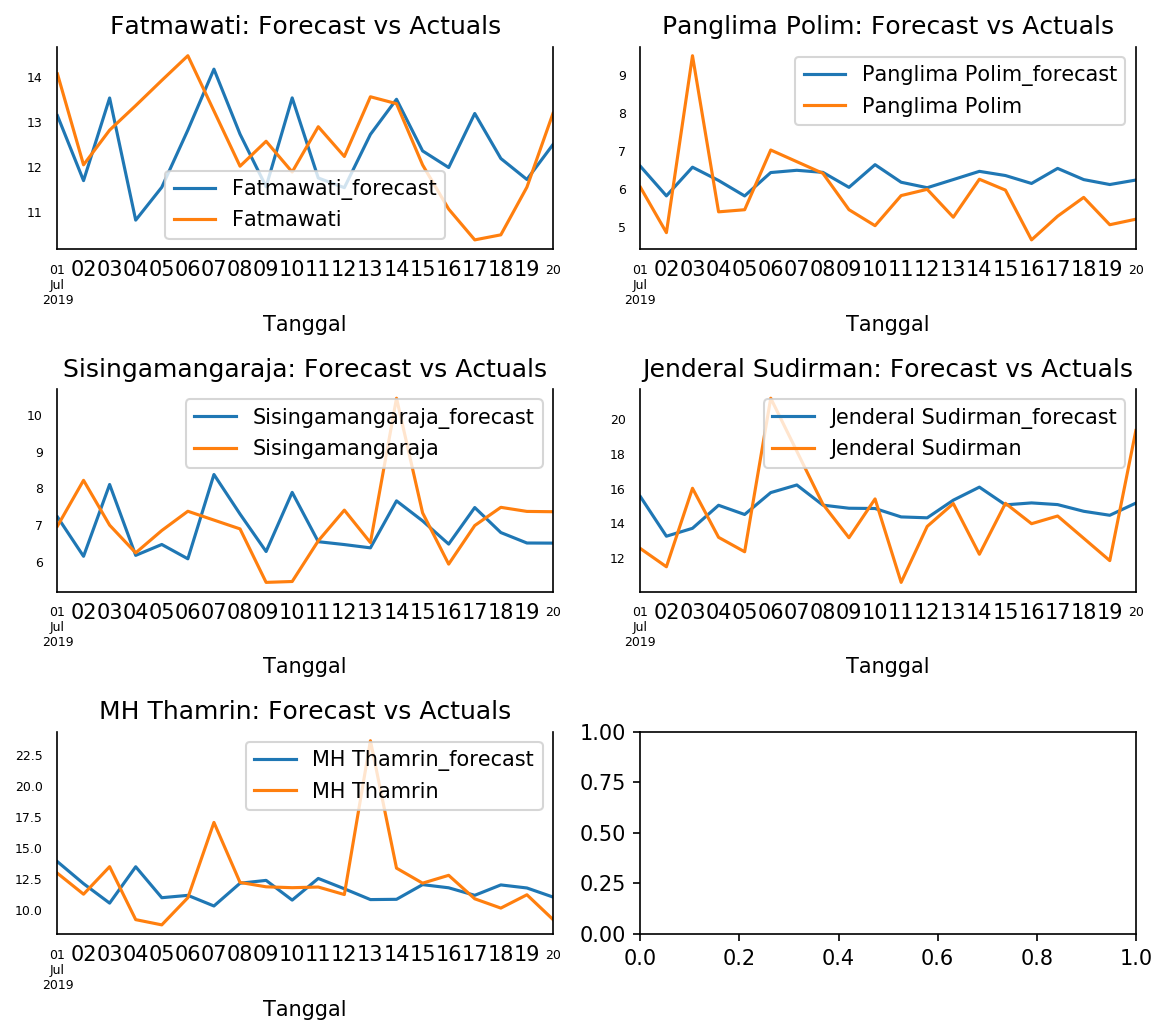

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=150, figsize=(8,7))
for i, (col,ax) in enumerate(zip(kec.columns, axes.flatten())):
    kec_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    kec_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [25]:
#Uji validitas model 
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE -> Menunjukkan seberapa eror hasil peramalan
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE -> Digunakan untuk mengetahui model bias atau tidak
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Fatmawati')
accuracy_prod = forecast_accuracy(kec_results['Fatmawati_forecast'].values, kec_test['Fatmawati'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Panglima Polim')
accuracy_prod = forecast_accuracy(kec_results['Panglima Polim_forecast'].values, kec_test['Panglima Polim'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Sisingamangaraja')
accuracy_prod = forecast_accuracy(kec_results['Sisingamangaraja_forecast'].values, kec_test['Sisingamangaraja'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Jenderal Sudirman')
accuracy_prod = forecast_accuracy(kec_results['Jenderal Sudirman_forecast'].values, kec_test['Jenderal Sudirman'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: MH Thamrin')
accuracy_prod = forecast_accuracy(kec_results['MH Thamrin_forecast'].values, kec_test['MH Thamrin'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: Fatmawati
mape :  0.0896
me :  -0.1104
mae :  1.1096
mpe :  -0.0011
rmse :  1.3421
corr :  0.0959
minmax :  0.0839

Forecast Accuracy of: Panglima Polim
mape :  0.1381
me :  0.4215
mae :  0.796
mpe :  0.0955
rmse :  1.034
corr :  0.4689
minmax :  0.1187

Forecast Accuracy of: Sisingamangaraja
mape :  0.1233
me :  -0.152
mae :  0.8857
mpe :  -0.004
rmse :  1.1656
corr :  0.1429
minmax :  0.1121

Forecast Accuracy of: Jenderal Sudirman
mape :  0.1394
me :  0.5109
mae :  1.9655
mpe :  0.0627
rmse :  2.4462
corr :  0.436
minmax :  0.1217

Forecast Accuracy of: MH Thamrin
mape :  0.1494
me :  -0.6286
mae :  2.0896
mpe :  -0.0024
rmse :  3.5992
corr :  -0.3163
minmax :  0.1356
